In [12]:
import sympy as sm
import qutip as qt
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 24})

## Eq(43)

In [25]:
# Define density matrix elements
rho_ee, rho_eg, rho_ge, rho_gg = sm.symbols('rho_ee, rho_eg, rho_ge, rho_gg')


# Define the density matrix
rho = sm.Matrix([[rho_ee, rho_eg], [rho_ge, rho_gg]])

# Define the imaginary unit
i = sm.I

# Define the Pauli matrices and other operators as before
sigma_x = sm.Matrix([[0, 1], [1, 0]])
sigma_y = sm.Matrix([[0, -i], [i, 0]])
sigma_plus = sm.Rational(1, 2) * (sigma_x + i * sigma_y)
sigma_minus = sm.Rational(1, 2) * (sigma_x - i * sigma_y)

# Define symbols for N tilde and gamma
N_tilde = sm.symbols('N_tilde', real=True, positive=True)  # N tilde
gamma = sm.symbols('gamma', real=True, positive=True)      # gamma

# Define D_rho expression
D_rho = (gamma * (N_tilde + 1) * (sigma_minus * rho * sigma_plus - 
           sm.Rational(1, 2) * (sigma_plus * sigma_minus * rho + rho * sigma_plus * sigma_minus)) + 
           gamma * N_tilde * (sigma_plus * rho * sigma_minus - 
           sm.Rational(1, 2) * (sigma_minus * sigma_plus * rho + rho * sigma_minus * sigma_plus)))

D_rho_epr = sm.simplify(D_rho)

# Define the Pauli Z matrix (sigma_z)
sigma_z = sm.Matrix([[1, 0], [0, -1]])

# Define delta and omega as symbolic variables
Delta = sm.symbols('Delta', real=True, positive=True)
Omega = sm.symbols('Omega', real=True, positive=True)

# Define the Hamiltonian
H = sm.Rational(1, 2) * Delta * sigma_z + Omega * (sigma_plus + sigma_minus)

# Define the commutator of the Hamiltonian with the density matrix
H_rho_comutator = H * rho - rho * H.H

rho_evalution_expr = -i * H_rho_comutator + D_rho

rho_valid = sm.Eq((rho_ee + rho_gg), 1)

eq = sm.Eq(rho_evalution_expr, sm.zeros(2))

sol = sm.solve((eq, rho_valid), (rho_ee, rho_eg, rho_ge, rho_gg))

rho_eess = list(sol.values())[0]

J = gamma * (N_tilde - (2 * N_tilde + 1) * rho_eess)

J_s = J.simplify()
J_s0 = sm.fraction(J_s)[0]
J_s1 = sm.fraction(J_s)[1]
colect_expr = sm.collect(J_s1, gamma)
J_s1_s = sm.factor(colect_expr.coeff(gamma, 2)) * gamma**2 + sm.factor(colect_expr.coeff(gamma, 0))

J_S = J_s0 / J_s1_s
j = sm.symbols('j')
sm.Eq(j, J_S)

Eq(j, -4*Omega**2*gamma/(gamma**2*(2*N_tilde + 1)**2 + 4*(Delta**2 + 2*Omega**2)))

### Eq. 138

In [3]:
gamma_L, gamma_R, chi, f_R_bar, f_R, f_L_bar, f_L = sm.symbols('gamma_L, gamma_R, chi, f_R_bar, f_R, f_L_bar, f_L')

eq_L = -(gamma_L + gamma_R)/2 + sm.sqrt(((gamma_L + gamma_R)/2)**2 + gamma_L * gamma_R * ((sm.exp(i * chi) - 1) * f_R * f_L_bar + (sm.exp(-i * chi) - 1) * f_L * f_R_bar))
eq_L

-gamma_L/2 - gamma_R/2 + sqrt(gamma_L*gamma_R*(f_L*f_R_bar*(-1 + exp(-I*chi)) + f_L_bar*f_R*(exp(I*chi) - 1)) + (gamma_L/2 + gamma_R/2)**2)

In [4]:
eq_L_derivative = -1*sm.diff(eq_L, chi, 2)
eq_L_derivative.subs(chi, 0).simplify()

gamma_L*gamma_R*(-2*gamma_L*gamma_R*(f_L*f_R_bar - f_L_bar*f_R)**2 + (gamma_L + gamma_R)**2*(f_L*f_R_bar + f_L_bar*f_R))/((gamma_L + gamma_R)**2*sqrt((gamma_L + gamma_R)**2))

In [5]:
eq_L_derivative_subs = eq_L_derivative.subs(chi, 0).simplify()
eq_L_derivative_subs_mod = eq_L_derivative_subs.subs([(f_L_bar, 1 - f_L), (f_R_bar, 1 - f_R)])

D_L = ((gamma_L * gamma_R)/(gamma_L + gamma_R)**3) * ((gamma_L + gamma_R)**2 * (f_L*f_L_bar + f_R*f_R_bar) + (gamma_L**2 + gamma_R**2) * (f_R - f_L)**2)
D_L

gamma_L*gamma_R*((-f_L + f_R)**2*(gamma_L**2 + gamma_R**2) + (gamma_L + gamma_R)**2*(f_L*f_L_bar + f_R*f_R_bar))/(gamma_L + gamma_R)**3

In [6]:
D_L_mod = D_L.subs([(f_L_bar, 1 - f_L), (f_R_bar, 1 - f_R)])

In [7]:
D_L_mod.subs([(gamma_L, 2), (gamma_R, 3), (f_L, 4), (f_R, 5)])

-4722/125

In [8]:
eq_L_derivative_subs_mod.subs([(gamma_L, 2), (gamma_R, 3), (f_L, 4), (f_R, 5)])

-4722/125

### Eq. 143

In [9]:
import sympy as sp

# Define symbols
t, chi, K_diff = sp.symbols('t chi K_diff', real=True)
L_chi = sp.Function('L_chi')
L = sp.Function('L')  # Original Liouvillian operator
H = sp.Function('H')  # Hamiltonian operator
rho_chi = sp.Function('rho_chi')(t)  # Density matrix with counting field
rho_tilde_chi = sp.Function('rho_tilde_chi')(t)  # Tilted density matrix

# Define the expression for rho_tilde_chi in terms of rho_chi
rho_tilde_chi_expr = sp.exp(chi**2 / 2 * K_diff * t) * rho_chi

# Differentiate rho_tilde_chi with respect to time
rho_tilde_chi_dot = sp.diff(rho_tilde_chi_expr, t)

# Define the modified Liouvillian L_chi
L_chi_expr = L(rho_chi) + sp.I * chi * H(rho_chi) - (chi**2 / 2) * K_diff * rho_chi

# Substitute d(rho_chi)/dt = L_chi * rho_chi
rho_chi_dot = sp.Function('rho_chi_dot')(t)
substitute_rho_chi_dot = L_chi_expr.subs(rho_chi, rho_chi_dot)

# Substitute rho_chi_dot expression into rho_tilde_chi_dot
final_expression = rho_tilde_chi_dot.subs(rho_chi_dot, substitute_rho_chi_dot)

# Simplify the final result
final_result = sp.simplify(final_expression)

# Display final result
final_result

(K_diff*chi**2*rho_chi(t)/2 + Derivative(rho_chi(t), t))*exp(K_diff*chi**2*t/2)

In [10]:
new_rho_tilde = rho_tilde_chi_dot.subs(sp.diff(rho_chi), L_chi(rho_chi))
new_rho_tilde

K_diff*chi**2*rho_chi(t)*exp(K_diff*chi**2*t/2)/2 + L_chi(rho_chi(t))*exp(K_diff*chi**2*t/2)

In [11]:
new_rho_tilde.subs(L_chi(rho_chi), L_chi_expr).simplify()

(I*chi*H(rho_chi(t)) + L(rho_chi(t)))*exp(K_diff*chi**2*t/2)

### Example A

In [34]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 0
Nb = 0.2
Ω = γt = 1.0
H = Ham(Δ, Ω)
c_ops = [np.sqrt(γt*(Nb + 1))*qt.sigmam(), np.sqrt(γt*Nb)*qt.sigmap()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")
    
    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)
    
    # Initialize the dissipative part
    L_vec_total = 0
    
    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec
    
    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total

rhoss

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.42971888+0.j         0.        -0.20080321j]
 [0.        +0.20080321j 0.57028112+0.j        ]]

In [36]:
# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = χ[1]-χ[0]

t = [5, 15, 30, 50]

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

In [37]:
print("Shape of pchis:", pchis.shape)
print("Shape of chi:", chi.shape)

Shape of pchis: (4, 1000)
Shape of chi: (1000,)


In [28]:
#Compute n vals
nmax = 10
n = np.arange(-nmax-20, nmax+20 + 1)
# Peform Fourier transform
def prob(n): 
    return np.abs([trapezoid(np.exp(-1j*ni*χ)*pchis, χ, dx=dχ, axis=1) for ni in n])/(2*np.pi)

P = prob(np.arange(-nmax, nmax + 1))
n.shape

(61,)

In [29]:
while P[0, 1] + P[-1, 1] > 1e-13:
        P = np.vstack((prob(np.arange(-nmax - 10, -nmax)), P, prob(np.arange(nmax + 1, nmax + 11))))
        nmax += 10
np.around(P, decimals=10)
P.T[0].shape

(61,)

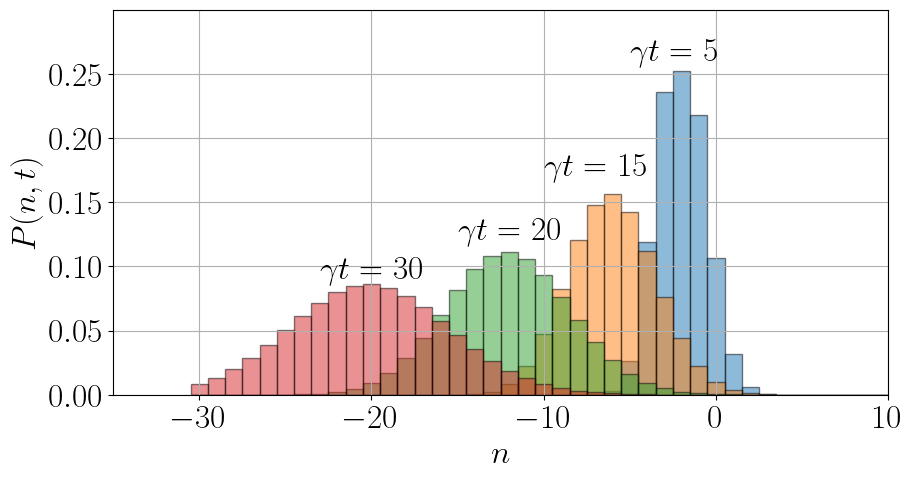

In [30]:
fig = plt.figure(figsize=(10, 5))

plt.bar(n, P.T[0], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[1], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[2], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[3], width = 1, alpha=0.5, edgecolor = 'k')

plt.xlim([-35, 10])
plt.ylim([0, 0.30])
plt.yticks(np.arange(0, 0.30, 0.05))
plt.text(-5, 0.26, r'$\gamma t=5$')
plt.text(-10, 0.17, r'$\gamma t=15$')
plt.text(-15, 0.12, r'$\gamma t=20$')
plt.text(-23, 0.09, r'$\gamma t=30$')
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n,t)$')
plt.show()

In [105]:
from math import sqrt

ts = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
delta = 0.0
omega = 1.0

H = delta*0.5*qt.sigmaz() + qt.sigmax()

ks = [2.0]
v = [2]

# # Rough
# phi_k, chi = 2, 3

c_ops = [sqrt(k)*qt.sigmaz() for k in ks]

def tilted_liouv_diff(H, L_list, chi, v_list, phi_k=0.1):

    # # # Check that the number of jump operators matches the number of v values
    if len(c_ops) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")
    
    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)

    # Initialize the dissipative part
    L_vec_total = 0

    for L, v in zip(L_list, v_list):
        L_vec = qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L)) + 1j*chi*v*(np.exp(-1j*phi_k)*qt.spre(L) + np.exp(1j*phi_k)*qt.spost(L.dag())) - chi**2 * 0.5 * v**2 * qt.to_super(qt.qeye(L.shape[0]))
        L_vec_total += L_vec

    return -1j * H_vec + L_vec_total

print(tilted_liouv_diff(H, c_ops, np.pi, v))


Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[-19.7392088 +17.68274812j   0.         -1.j
    0.         +1.j           0.         +0.j        ]
 [  0.         -1.j         -25.51340154 +0.j
    0.         +0.j           0.         +1.j        ]
 [  0.         +1.j           0.         +0.j
  -21.96501607 +0.j           0.         -1.j        ]
 [  0.         +0.j           0.         +1.j
    0.         -1.j         -19.7392088 -17.68274812j]]


In [106]:
# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# Compute tilted Liouvillians
liouvs = [tilted_liouv_diff(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in ts]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, χ[6], ν)

In [107]:
print("Shape of pchis:", pchis.shape)
print("Shape of chi:", chi.shape)

Shape of pchis: (7, 1000)
Shape of chi: (1000,)


In [108]:
#Compute n vals
nmax = 20
# n = np.arange(-nmax-20, nmax+20 + 1)
# Peform Fourier transform
def prob(n): 
    return np.abs([trapezoid(np.exp(-1j*ni*chi)*pchis, chi, dx=d_chi, axis=1) for ni in n])/(2*np.pi)

n = np.arange(-nmax, nmax + 1, 0.025)
P = prob(n)
P.shape

(1640, 7)

In [109]:
import numpy as np

# Assuming P is a NumPy array of shape (1640, 7)
# Step 1: Calculate the sum of the second column
for i in range(P.shape[1]):
    norm = np.sum(P[:, i])

    # Step 2: Normalize the second column
    if norm != 0:  # Avoid division by zero
        P[:, i] /= norm
    else:
        print("Normalization factor is zero. Skipping normalization.")
        break
print(P)


[[8.17639980e-07 1.01372760e-06 4.15405793e-09 ... 1.06015436e-05
  4.47848255e-04 4.31501175e-04]
 [7.60327334e-09 1.53801497e-06 5.46438821e-09 ... 1.08896988e-05
  4.50342641e-04 4.32163363e-04]
 [8.34947448e-07 2.05406810e-06 6.74396120e-09 ... 1.11847999e-05
  4.52828023e-04 4.32825374e-04]
 ...
 [1.61153480e-06 2.39408499e-06 7.42252900e-09 ... 3.71756054e-06
  3.51775116e-04 4.07056905e-04]
 [8.28293401e-07 1.91244723e-06 6.23464887e-09 ... 3.60831565e-06
  3.49144141e-04 4.06403078e-04]
 [4.18956387e-08 1.42012322e-06 5.01090232e-09 ... 3.50200393e-06
  3.46514801e-04 4.05749908e-04]]


In [110]:
# while P[0, 1] + P[-1, 1] > 1e-10:
#         P = np.vstack((prob(np.arange(-nmax - 10, -nmax)), P, prob(np.arange(nmax + 1, nmax + 11))))
#         nmax += 10
# np.around(P, decimals=10)
# P.T[0].shape

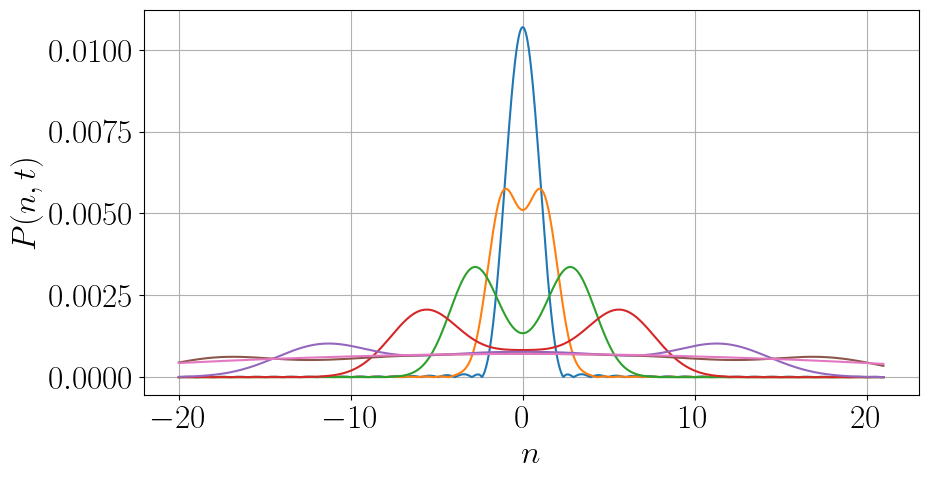

In [111]:
fig = plt.figure(figsize=(10, 5))

plt.plot(n, P.T[0]) #width = 1, alpha=0.5, edgecolor = 'k')
plt.plot(n, P.T[1]) #width = 1, alpha=0.5, edgecolor = 'k')
plt.plot(n, P.T[2]) #width = 1, alpha=0.5, edgecolor = 'k')
plt.plot(n, P.T[3]) #width = 1, alpha=0.5, edgecolor = 'k')
plt.plot(n, P.T[4])
plt.plot(n, P.T[5])
plt.plot(n, P.T[6])


# plt.xlim([-35, 10])
# plt.ylim([0, 0.30])
# plt.yticks(np.arange(0, 0.015, 0.002))
# plt.xticks(np.arange(-20, 20, 2))
# plt.text(-5, 0.26, r'$\gamma t=5$')
# plt.text(-10, 0.17, r'$\gamma t=15$')
# plt.text(-15, 0.12, r'$\gamma t=20$')
# plt.text(-23, 0.09, r'$\gamma t=30$')

plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n,t)$')
# plt.legend()
plt.show()